# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
import sklearn.metrics as metrics

plt.style.use("fivethirtyeight")

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [2]:
# Your code here. 

x_values = [17, 51, 27, 21, 36, 48, 19, 26, 54, 30]
y_values = [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]

student_data = pd.DataFrame({'X': x_values, 'Y': y_values})
student_data

,X,Y
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

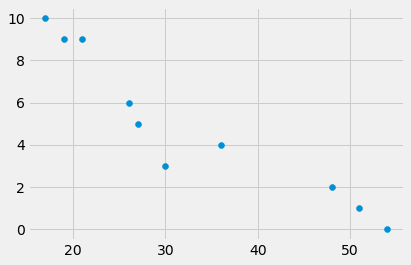

In [3]:
# Your code here.

plt.scatter(student_data['X'], student_data['Y'])

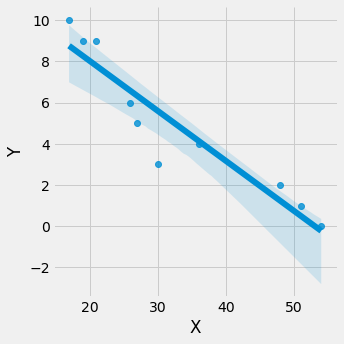

In [4]:
sns.lmplot('X', 'Y', data=student_data)

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [5]:
# Your response here. 

# There seems to be a negative correlation between age and number of tardies: the older the student, the less
# likely he/she is to be late for class

# H0: there is no correlation between age and number of tardies
# H1: there is a correlation between age and number of tardies

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [6]:
# Your response here.

# covariance and correlation of the variables
# cov(X, Y) = (sum (x - mean(X)) * (y - mean(Y)) ) * 1/(n-1)

np.cov(student_data['X'], student_data['Y'])

# As AGE (X) increases TARDIES (Y) decreases. The covariance matrix shows this clearly:

array([[187.65555556, -45.56666667],
       [-45.56666667,  12.54444444]])

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [7]:
# Your response here.
 
# Pearson's correlation coefficient = covariance(X, Y) / (stdv(X) * stdv(Y))
# number between -1 and 1 that indicates the extent to which two variables are linearly related 
# and can be used to summarize the strength of the linear relationship

r, p = stats.pearsonr(student_data['X'],student_data['Y'])
print('Pearson correlation', r)

# We can see that the two variables are negatively correlated and that the correlation is -0.94. 
# This suggests a high level of linear correlation, e.g. a value above 0.5 and close to 1.0.

Pearson correlation -0.9391626886887121


Plot your regression model on your scatter plot.

In [8]:
# Your code here.

'''
- stats.linregress: calculates a linear least-squares regression for two sets of measurements.

- slope: slope of the regression line

- intercept: intercept of the regression line

- rvalue: rorrelation coefficient

- pvalue: two-sided p-value for a hypothesis test whose null hypothesis 
is that the slope is zero, using Wald Test with t-distribution of the test statistic.

- stderr: standard error of the estimated gradient.

'''

slope, intercept, r_value, p_value, std_err = stats.linregress(student_data['X'],student_data['Y'])
print('Slope: ',slope)
print('Intercept: ',intercept)
print('r: ', r_value)
print('p_val: ', p_value)
print('std_err: ', std_err)

Slope:  -0.2428207709159808
Intercept:  12.888803363135768
r:  -0.9391626886887121
p_val:  5.56665383455343e-05
std_err:  0.03139728816158607


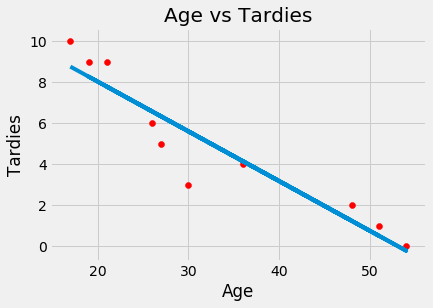

In [9]:
x = student_data['X']
y = intercept + slope * x 
plt.plot(x, y)
plt.scatter(student_data['X'], student_data['Y'], color='r')
plt.xlabel('Age')
plt.ylabel('Tardies')
plt.title('Age vs Tardies')

plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [10]:
# Your response here

# H0: Age and Tardies are not significantly correlated 
# H1: Age and Tardies are significantly correlated 

print('Pearson correlation:', r,'p-value:', p)

# Since p-value < 0.05: we reject H0 and can can conclude with a confidence level of 95% that 
# the varuables are significanlty correlated

# Since the Pearson's correlation is close to -1, we can say that age is a good predictor of tardiness given their
# strong negative correlation

Pearson correlation: -0.9391626886887121 p-value: 5.5666538345534396e-05


## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [11]:
# Import any libraries you may need & the data

vehicles = pd.read_csv('vehicles.csv')
vehicles.head(5)

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


In [12]:
vehicles.shape

(35952, 15)

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [13]:
# Your response here. 

vehicles_df = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 
                        'CO2 Emission Grams/Mile']]
                        
# Calculating the correlations between each of these variables and the outcome

vehicles_df.corr()

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
Year,1.000000,0.082469,-0.221084,0.204751,-0.091913,-0.222300
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.778153,0.752393
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.916208,0.986189
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.875185,-0.926229
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,1.000000,0.930865
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,0.930865,1.000000


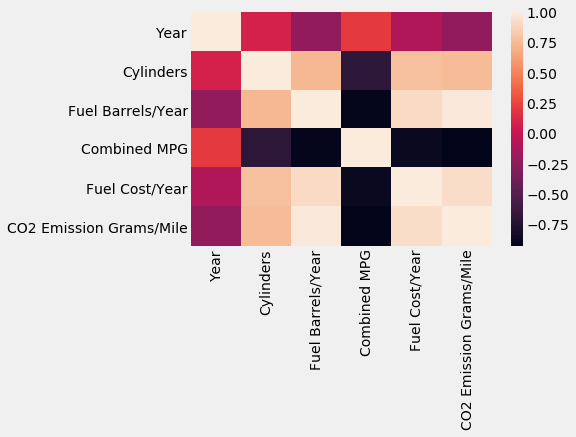

In [14]:
sns.heatmap(vehicles_df.corr())

In [15]:
# Most important variable determining CO2 emissions: Fuel Barrels/Year = 0.986189 
# Least amount of helpful information CO2 emissions: Year =  0.222300

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

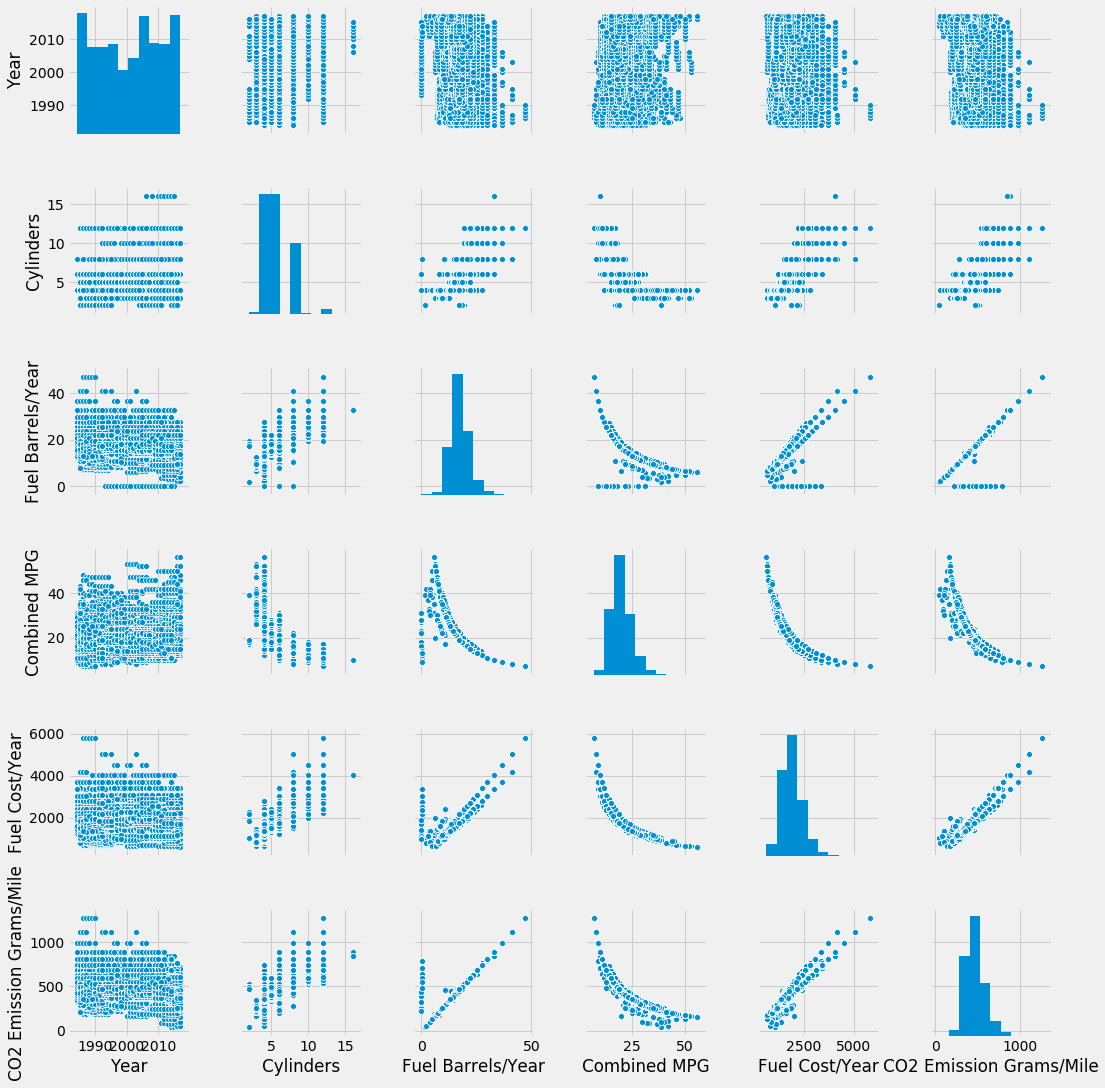

In [16]:
# Multiple linear regression

sns.pairplot(vehicles_df)

In [17]:
slope, intercept, r_value, p_value, std_err = stats.linregress(vehicles_df['Fuel Barrels/Year'],
                                                               vehicles_df['CO2 Emission Grams/Mile'])

print('Slope: ',slope)
print('Intercept: ',intercept)
print('r: ', r_value)
print('p_val: ', p_value)
print('std_err: ', std_err)

Slope:  26.283625397470274
Intercept:  12.486520830757001
r:  0.9861886621428732
p_val:  0.0
std_err:  0.023281123789227146


In [18]:
# Your response here. 

# Linear Regression Model
x = vehicles_df[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Fuel Cost/Year',
                      'Combined MPG']]
y = vehicles_df['CO2 Emission Grams/Mile']

linear_regress = LinearRegression()

In [19]:
linear_regression_model = linear_regress.fit(x,y)
linear_regression_model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
print(linear_regress.intercept_, linear_regress.coef_)

y_pred = linear_regress.predict(x)

stats.pearsonr(y,y_pred)

769.8882836465632 [-0.32061673  1.87879976 19.05292507  0.03230948 -3.04039938]


(0.990390575493785, 0.0)

In [21]:
df = pd.DataFrame({'Actual': y, 'Predicted': y_pred})
print(df.head(10))

       Actual   Predicted
0  522.764706  522.030384
1  683.615385  671.001053
2  555.437500  552.684951
3  683.615385  670.680436
4  555.437500  570.340582
5  403.954545  404.163421
6  370.291667  371.063665
7  444.350000  447.393854
8  403.954545  403.842805
9  370.291667  370.743048


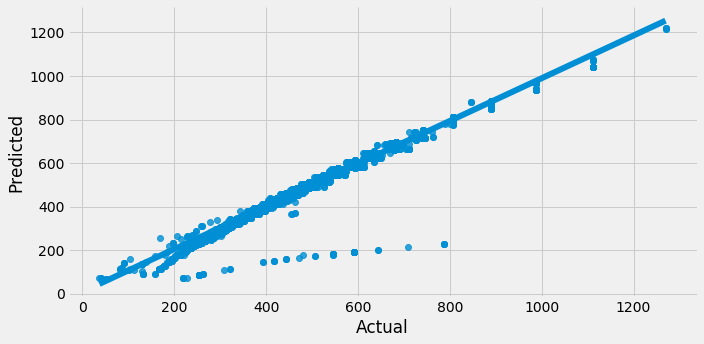

In [22]:
sns.lmplot('Actual','Predicted', data = df, aspect=2)

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [23]:
# Your response here. 

def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance = metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error = metrics.mean_absolute_error(y_true, y_pred) 
    mse = metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error = metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error = metrics.median_absolute_error(y_true, y_pred)
    r2 = metrics.r2_score(y_true, y_pred)

    print('Explained variance: ', round(explained_variance,4))    
    print('Mean Squared Logarithmic Error (MSLE): ', round(mean_squared_log_error,4))
    print('R-squared (r2): ', round(r2,4))
    print('Mean Absolute Error (MAE): ', round(mean_absolute_error,4))
    print('Mean Squared Error (MSE): ', round(mse,4))
    print('Root-Mean-Square Deviation (RSMD): ', round(np.sqrt(mse),4))

regression_results(y, y_pred)    

Explained variance:  0.9809
Mean Squared Logarithmic Error (MSLE):  0.0027
R-squared (r2):  0.9809
Mean Absolute Error (MAE):  7.4877
Mean Squared Error (MSE):  271.1197
Root-Mean-Square Deviation (RSMD):  16.4657


In [24]:
# Explained variance is used to measure the discrepancy between a model and actual data and at 0.9809, it shows
# that practically all the variance is explained by the dependent variable (CO2 Emission Grams/Mile)

# Mean squared logarithmic error (MSLE) can be interpreted as a measure of the ratio between the true 
# and predicted values.

# R-squared is a statistical measure of how close the data are to the fitted regression line 
# 100% indicates that the model explains all the variability of the response data around its mean.

# Mean Absolute Error (MAE) is a measure of difference between two continuous variables.

# Mean Squared Error (MSE) is a risk function, corresponding to the expected value of the squared error loss

# Root-Mean-Square Deviation (RSMD) is the square root of the average of squared errors. The effect of each 
# error on RMSD is proportional to the size of the squared error; 
# thus larger errors have a disproportionately large effect on RMSD

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [30]:
# Your code here. 

x_values = [1,3,4,6,7,8,11,14]
y_values = [1,2,4,4,5,7,8,13]

party_data = pd.DataFrame({'People invited': x_values, 'People who attended': y_values})
party_data

,People invited,People who attended
0,1,1
1,3,2
2,4,4
3,6,4
4,7,5
5,8,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

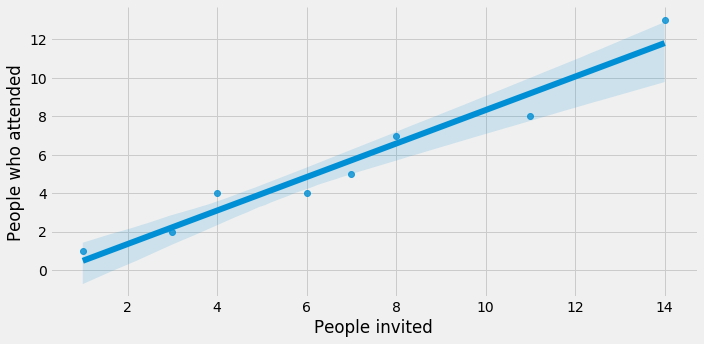

In [35]:
# Your code here.

sns.lmplot('People invited','People who attended', data = party_data, aspect=2)

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [36]:
# Your response here. 

# There seems to be a positive correlation between the number of people invited and who attended

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [28]:
# Your response here. 



What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [29]:
# Your response here. 